## <font color="blue">4.0 - Cash Flow: EDA and Data Visualization<font>
---

##### <font color="blue">Imports<font>
---

In [1]:
#import libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.ticker as mtick
from tabulate import tabulate
import textwrap
%matplotlib notebook
%matplotlib inline



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df  = pd.read_parquet('data/cleaned/df_final_2.0.parquet')

In [3]:
#Let's look at our remaining nulls.
nulls = pd.DataFrame(df.isna().sum())
nulls = nulls.loc[nulls[0] != 0]
nulls

,0
total_bathrooms,85
effective_year_built,237
min_annual_rent,1026
avg_annual_rent,1026
max_annual_rent,1026
min_coc,1026
avg_coc,1026
max_coc,1026
median_hh_income_b_aa,366
median_hh_income_asian,55


<font color="blue">We have enough rows of data, so we will be dropping these nulls<font>

In [4]:
df.dropna(inplace=True)

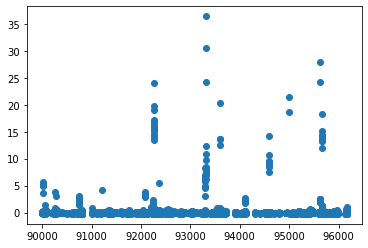

In [5]:
plt.scatter(y = df['avg_coc'], x = df['zip']);

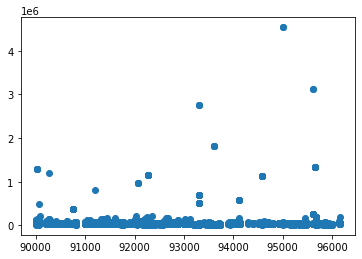

In [6]:
#Reviewing the scale and spread of our revenue numbers
plt.scatter(y = df['avg_annual_rent'], x = df['zip']);

Text(39661.64400000001, 14809.095, 'Median: 36056.04')

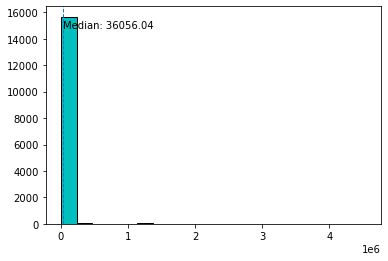

In [7]:
x = df['avg_annual_rent']

result = plt.hist(x, bins=20, color='c', edgecolor='k')
plt.axvline(x.median(), linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))

<font color="blue">Using Standard Deviation to help with Outliers and Skewing<font>

In [8]:
#We will now give our data a little bit of a haircut to only include 3 standard deviations from the mean.

df = df[(np.abs(stats.zscore(df['dom'])) <= 3)]
df = df[(np.abs(stats.zscore(df['price_per_sqft'])) <= 3)]
df = df[(np.abs(stats.zscore(df['min_annual_rent'])) <= 3)]
df = df[(np.abs(stats.zscore(df['avg_annual_rent'])) <= 3)]
df = df[(np.abs(stats.zscore(df['max_annual_rent'])) <= 3)]
df = df[(np.abs(stats.zscore(df['min_coc'])) <= 3)]
df = df[(np.abs(stats.zscore(df['avg_coc'])) <= 3)]
df = df[(np.abs(stats.zscore(df['max_coc'])) <= 3)]
df = df[(np.abs(stats.zscore(df['avg_coc'])) <= 3)]
#Let's look at those plots again.

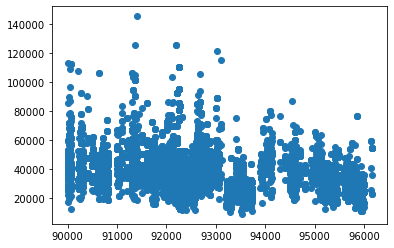

In [9]:
plt.scatter(y = df['avg_annual_rent'], x = df['zip']);

Text(38876.772000000004, 3555.09, 'Median: 35342.52')

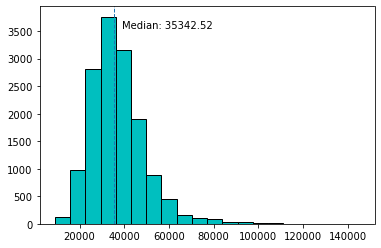

In [10]:
x = df['avg_annual_rent']

result = plt.hist(x, bins=20, color='c', edgecolor='k')
plt.axvline(x.median(), linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()))

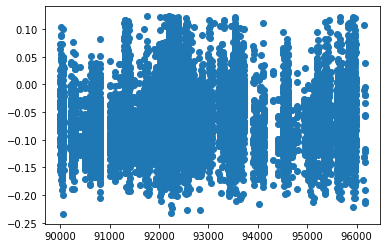

In [11]:
plt.scatter(y = df['avg_coc'], x = df['zip']);

<font color="blue">The plots are looking much better now.<font>

In [12]:
df.to_parquet('data/cleaned/df_final.parquet', index=False)

##### <font color="blue">EDA<font>
---


In [13]:
#Dummifying 

df = pd.get_dummies(df, columns = ['property_type', 'total_bathrooms', 'bedrooms', 'mls_status', 'county'], 
            prefix = ['type_', 'bath_', 'bed_', 'status_', 'county_'])

In [14]:
df.shape

(14499, 262)

##### <font color="blue">Heat Maps<font>

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_17371/3495022789.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(dfc.corr()[['avg_coc']].sort_values('avg_coc', ascending=False).head(10),


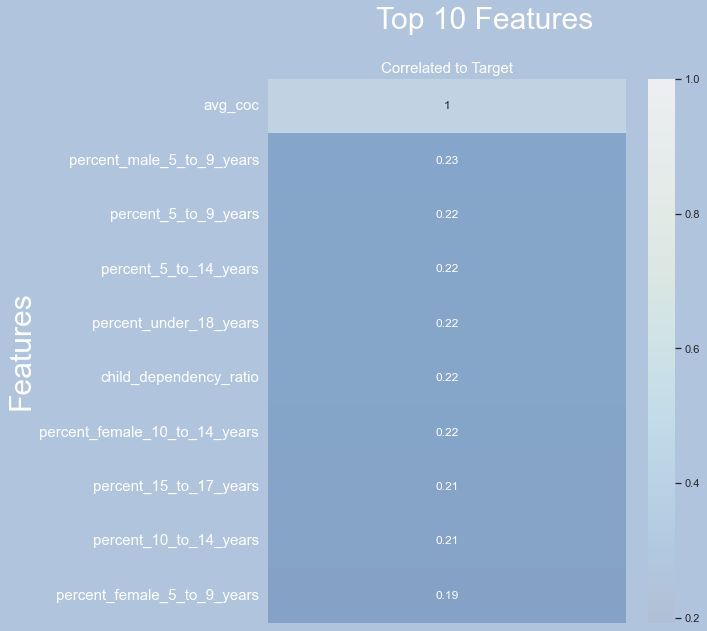

In [19]:
bad_corr = ['address', 'city', 'zip', 'apn', 'mls_date', 'today', 'target_cfp', 'min_cfp', 'avg_cfp', 'max_cfp', 'min_coc', 
            'max_coc', 'min_annual_rent', 'avg_annual_rent', 'max_annual_rent', 'mls_amount', 'principal', 
            'costs', 'mortgage', 'est._value', 'total_assessed_value', 'price_per_sqft']
            
dfc = df.drop(bad_corr, axis = 1)

plt.figure(figsize=(8,10))
ax = sns.heatmap(dfc.corr()[['avg_coc']].sort_values('avg_coc', ascending=False).head(10),
            annot=True, 
            cmap='GnBu_r',
            alpha=.25)
sns.set(font_scale=3)
plt.xticks([])
plt.ylabel('Features', fontsize=30, color='white')
plt.yticks(fontsize=15, color='white')
plt.suptitle('Top 10 Features', fontsize=30, color='white')
plt.title('Correlated to Target', fontsize=15, color='white')
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/Positive_heat.png',dpi=300, bbox_inches = "tight");

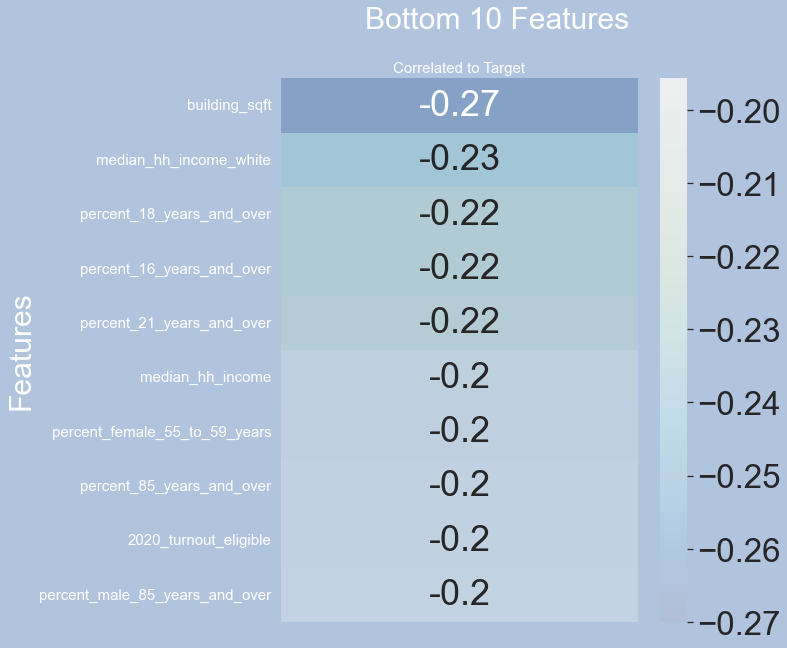

In [16]:
#plot correlation of features to target val

dfc = df.drop(bad_corr, axis = 1)

plt.figure(figsize=(8,10))
ax = sns.heatmap(dfc.corr()[['avg_coc']].sort_values('avg_coc').head(10),
            annot=True, 
            cmap='GnBu_r',
            alpha=.25)
sns.set(font_scale=1)
plt.suptitle('Bottom 10 Features', fontsize=30, color='white')
plt.title('Correlated to Target', fontsize=15, color='white')
plt.xticks([])
plt.ylabel('Features', fontsize=30, color='white')
plt.yticks(fontsize=15, color='white')
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/Negative_heat.png',dpi=300, bbox_inches = "tight");

In [17]:
#Dummified DF saved for Modeling.
df.to_parquet('data/cleaned/df_final_2.0.parquet')

In [18]:
#Reading PreDummified DF for more EDA, now that we have the correlation info. 
df = pd.read_parquet('data/cleaned/df_final.parquet')

##### <font color="blue">Scatters<font>

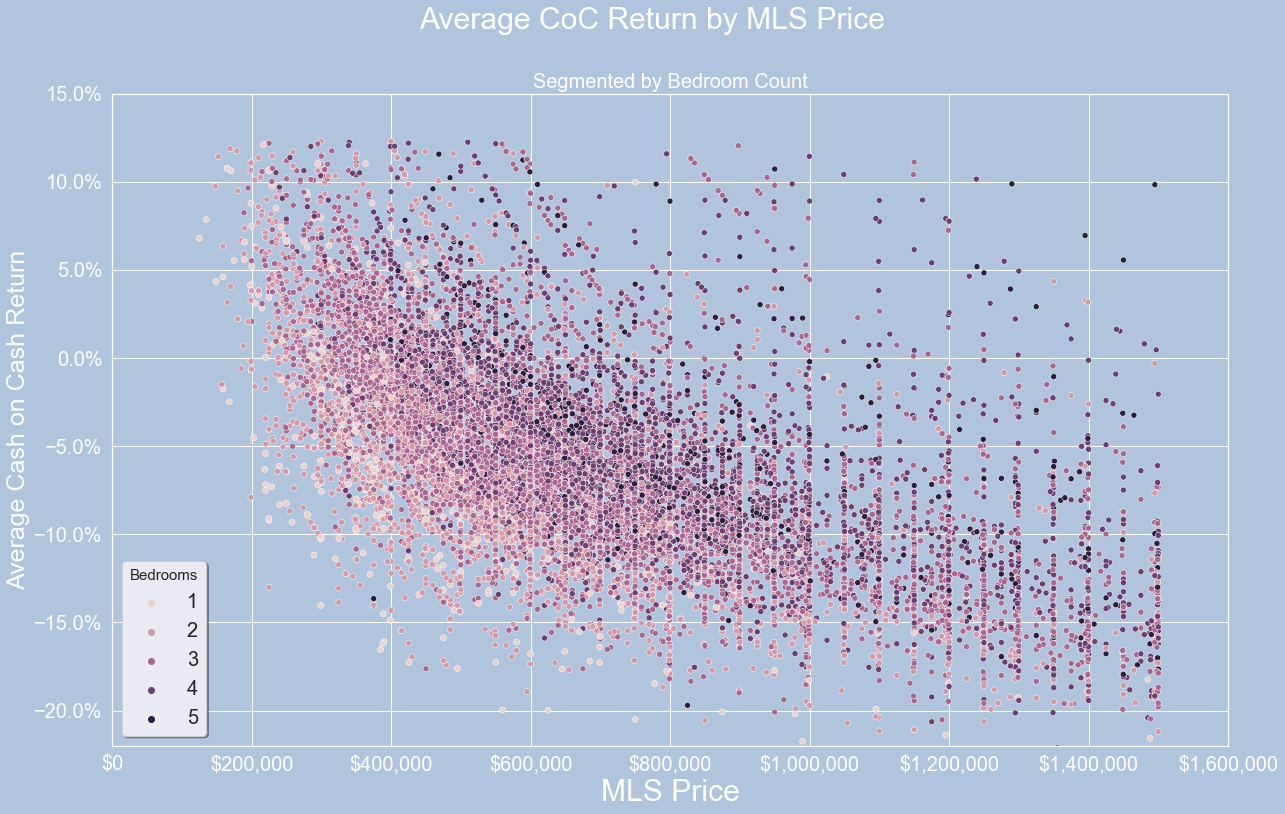

In [101]:
plt.figure(figsize=(20,12))
ax = sns.scatterplot(x='mls_amount',
                y='avg_coc',
                hue='bedrooms',
                data=df)
plt.ylim(-0.22, .15)
plt.xlim(0, 1600000)

plt.suptitle('Average CoC Return by MLS Price', fontsize=30, color='white')
plt.title('Segmented by Bedroom Count', fontsize=20, color='white')
plt.xlabel('MLS Price', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
plt.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', colors='white', which='major', labelsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Bedrooms', title_fontsize= 15, loc='lower left', shadow=True, fontsize=20)
plt.savefig('Plots/scatter.avgcoc.mlsprice.png',dpi=300, bbox_inches = "tight")
plt.show()





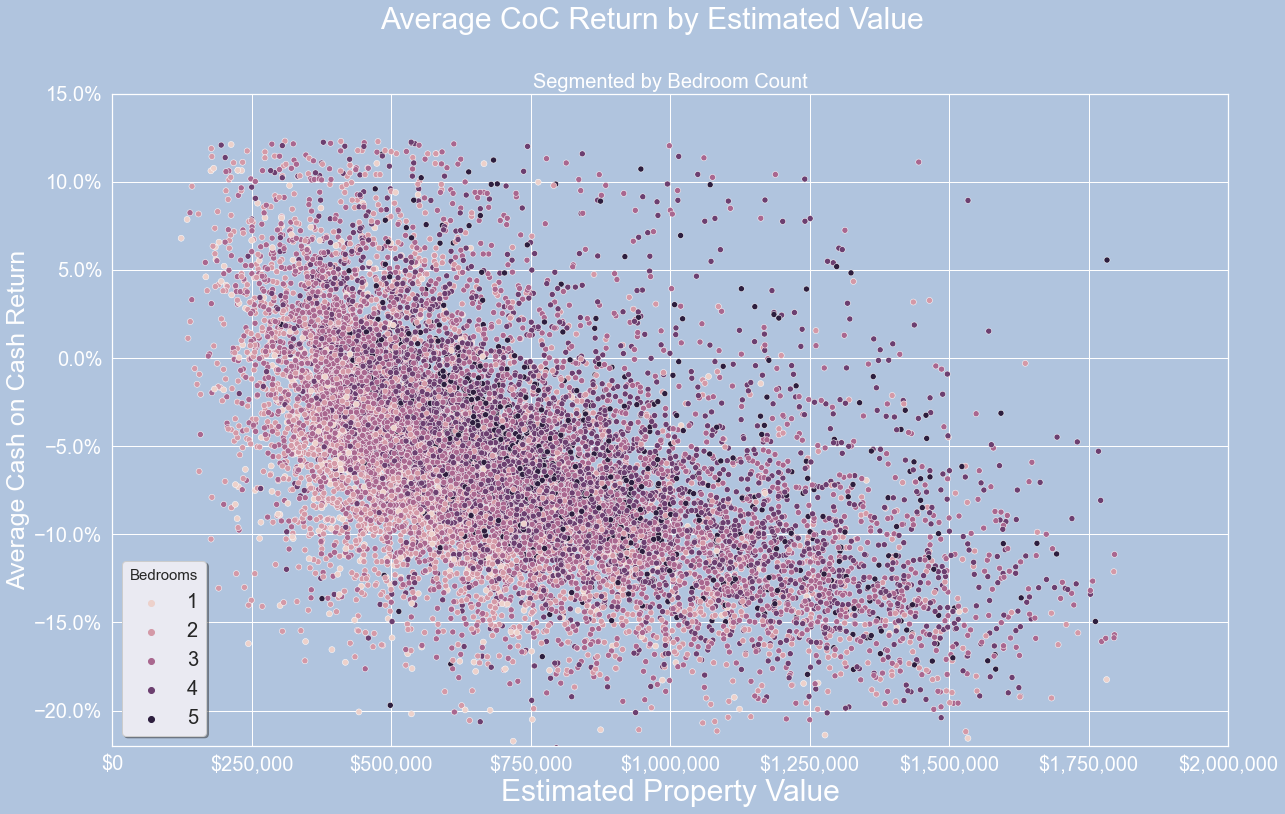

In [97]:
plt.figure(figsize=(20,12))
ax = sns.scatterplot(x='est._value',
                y='avg_coc',
                hue='bedrooms',
                data=df)
plt.ylim(-0.22, .15)
plt.xlim(0, 2000000)

plt.suptitle('Average CoC Return by Estimated Value', fontsize=30, color='white')
plt.title('Segmented by Bedroom Count', fontsize=20, color='white')
plt.xlabel('Estimated Property Value', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
plt.ticklabel_format(useOffset=False, style='plain')
ax.tick_params(axis='both', colors='white', which='major', labelsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Bedrooms', title_fontsize= 15, loc='lower left', shadow=True, fontsize=20)
plt.savefig('Plots/scatter.avgcoc.estvalue.png',dpi=300, bbox_inches = "tight")
plt.show()



##### <font color="blue">Histograms<font>

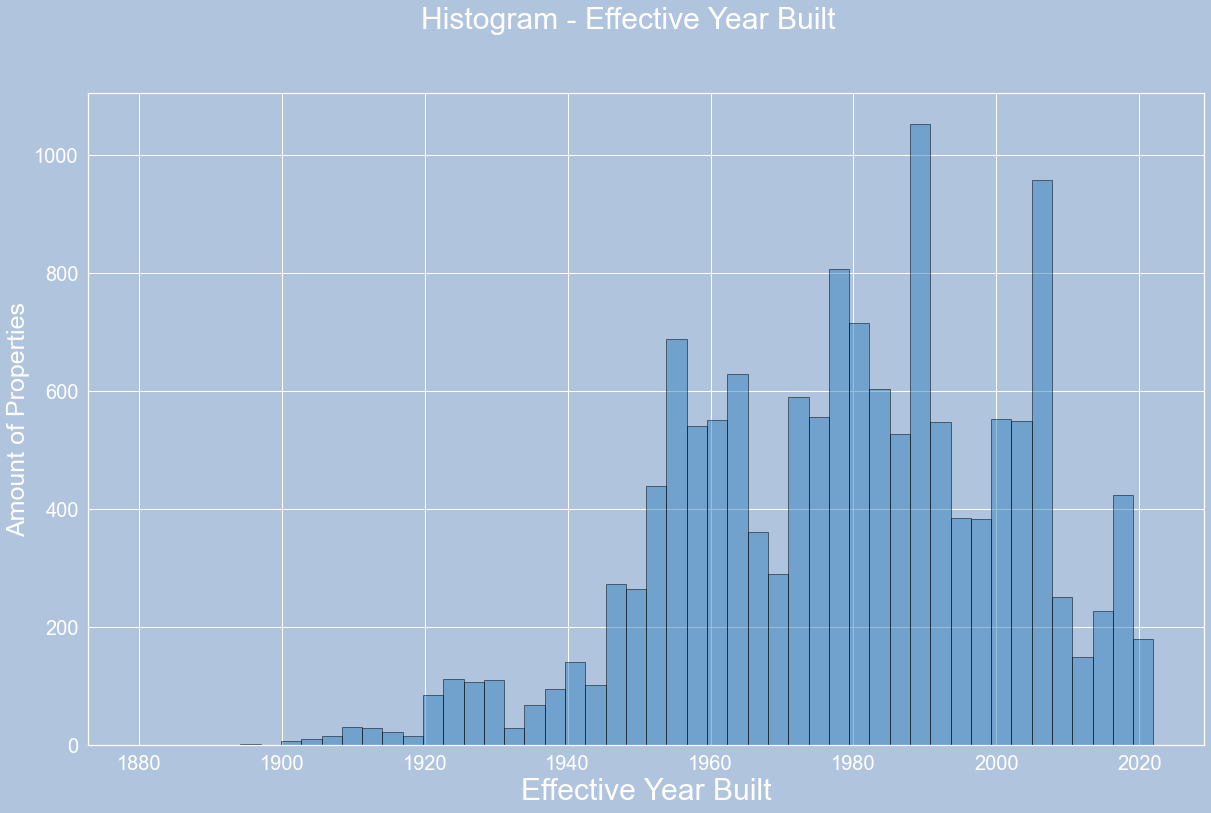

In [21]:
ax = df['effective_year_built'].plot(
    kind='hist',
    figsize = (20, 12),
    bins= 50,
    cmap='tab20c',
    alpha = .5,
    edgecolor = 'black')
# plt.axvline(0, color='white', linestyle='dashed', linewidth=5)
# plt.annotate('Profitability to the Right of this Line', xy=(0, 400), xytext=(.01, 400), color='white', fontsize=25, arrowprops={'width':0.4,'headwidth':7,'color':'white'})
plt.suptitle('Histogram - Effective Year Built', fontsize=30, color='white')
plt.xlabel('Effective Year Built', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Amount of Properties', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/hist.MLS.png',dpi=300, bbox_inches = "tight")
plt.show()


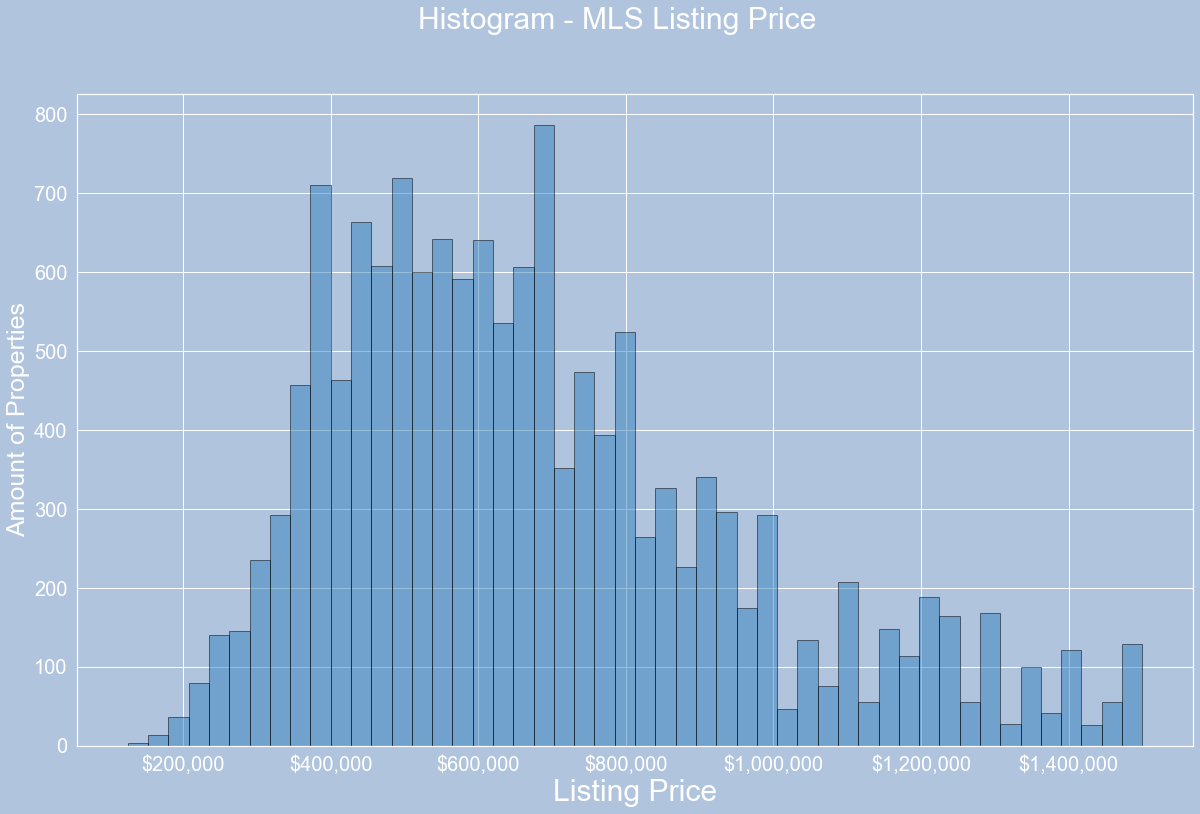

In [98]:
ax = df['mls_amount'].plot(
    kind='hist',
    figsize = (20, 12),
    bins= 50,
    cmap='tab20c',
    alpha = .5,
    edgecolor = 'black')
# plt.axvline(0, color='white', linestyle='dashed', linewidth=5)
# plt.annotate('Profitability to the Right of this Line', xy=(0, 400), xytext=(.01, 400), color='white', fontsize=25, arrowprops={'width':0.4,'headwidth':7,'color':'white'})
plt.suptitle('Histogram - MLS Listing Price', fontsize=30, color='white')
plt.xlabel('Listing Price', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Amount of Properties', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.savefig('Plots/hist.MLS.png',dpi=300, bbox_inches = "tight")
plt.show()


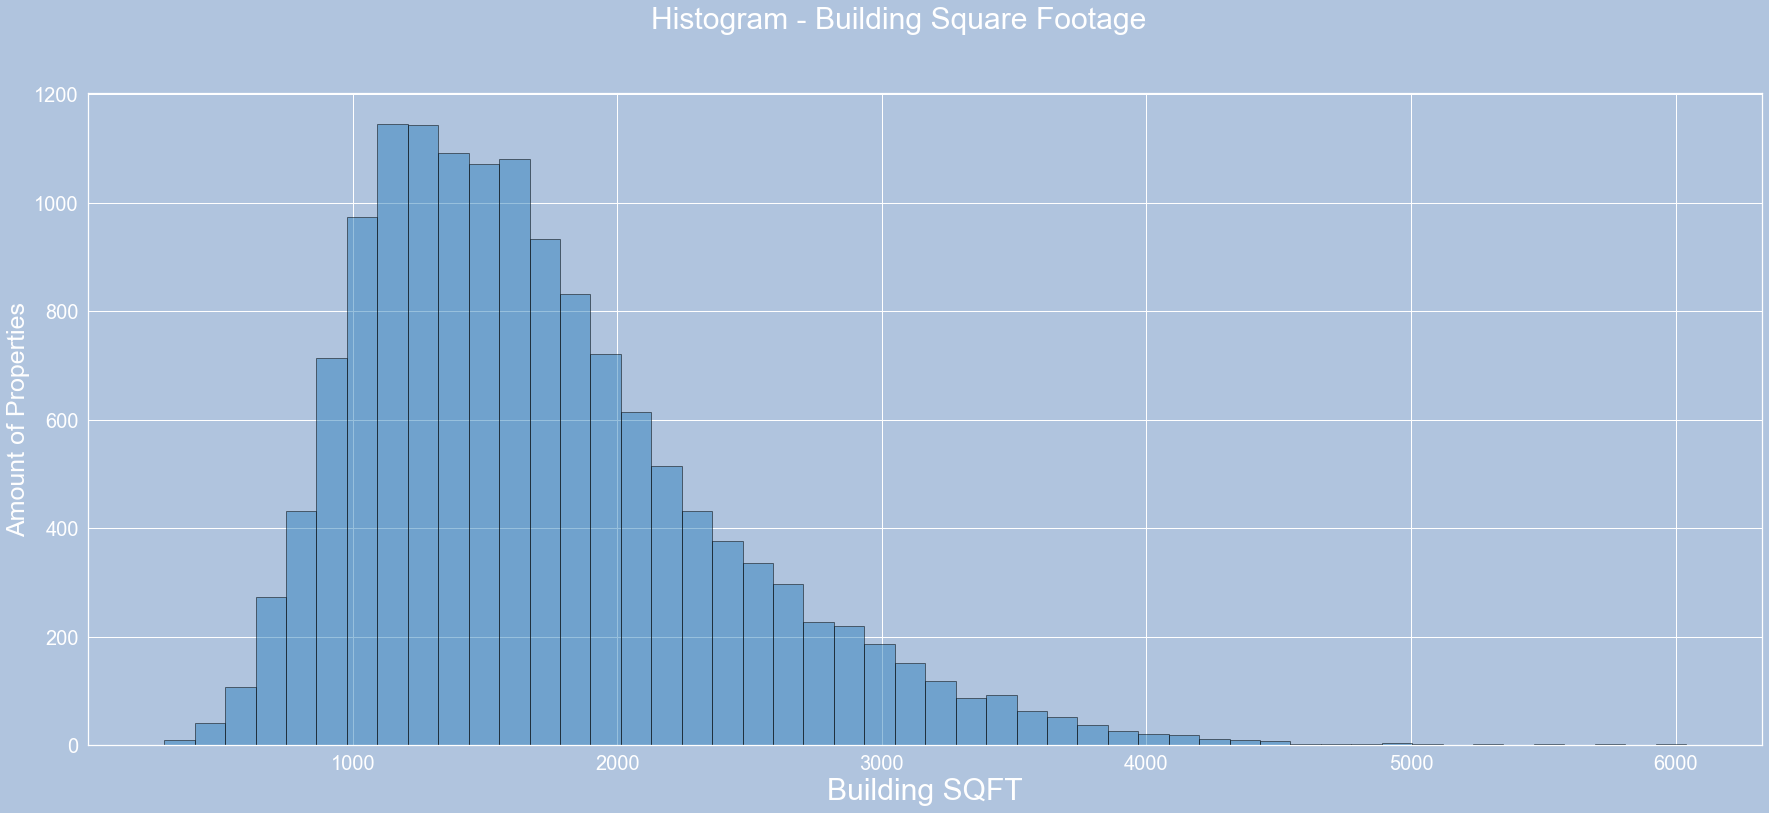

In [99]:
ax = df['building_sqft'].plot(
    kind='hist',
    figsize = (30, 12),
    bins= 50,
    cmap='tab20c',
    alpha = .5,
    edgecolor = 'black')
# plt.axvline(0, color='white', linestyle='dashed', linewidth=5)
# plt.annotate('Profitability to the Right of this Line', xy=(0, 400), xytext=(.01, 400), color='white', fontsize=25, arrowprops={'width':0.4,'headwidth':7,'color':'white'})
plt.suptitle('Histogram - Building Square Footage', fontsize=30, color='white')
plt.xlabel('Building SQFT', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Amount of Properties', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/hist.bldgsqft.png',dpi=300, bbox_inches = "tight")
plt.show()


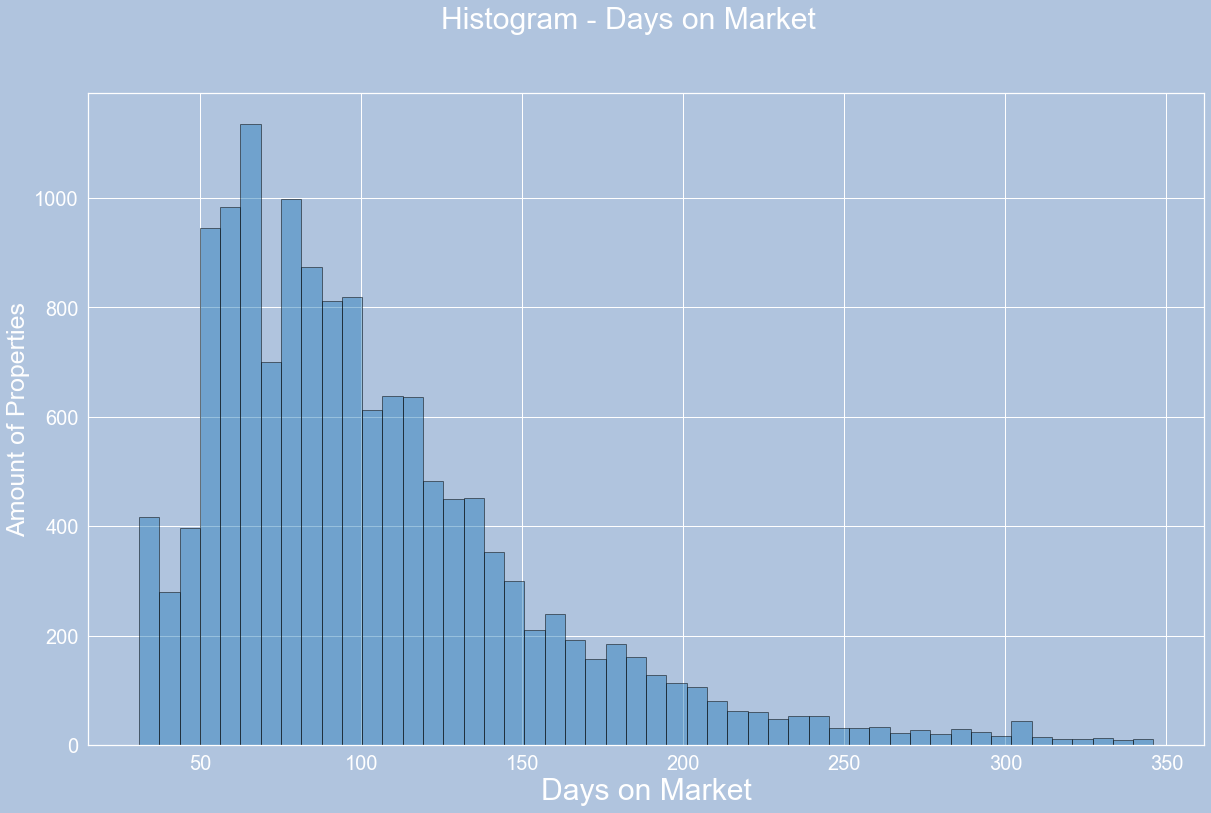

In [100]:
ax = df['dom'].plot(
    kind='hist',
    figsize = (20, 12),
    bins= 50,
    cmap='tab20c',
    alpha = .5,
    edgecolor = 'black')
# plt.axvline(0, color='white', linestyle='dashed', linewidth=5)
# plt.annotate('Profitability to the Right of this Line', xy=(0, 400), xytext=(.01, 400), color='white', fontsize=25, arrowprops={'width':0.4,'headwidth':7,'color':'white'})
plt.suptitle('Histogram - Days on Market', fontsize=30, color='white')
plt.xlabel('Days on Market', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Amount of Properties', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
#plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/hist.DOM.png',dpi=300, bbox_inches = "tight")
plt.show()


##### <font color="blue">Bars<font>

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/458014459.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

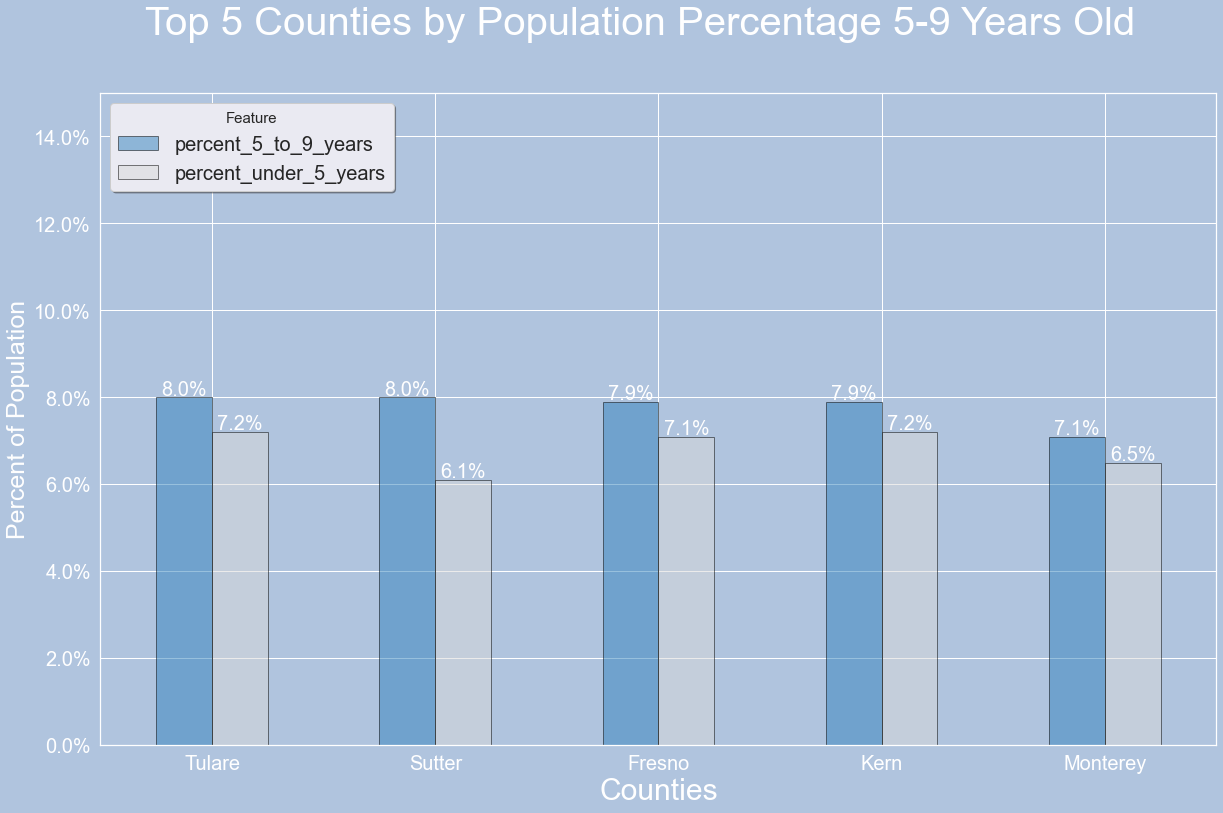

In [107]:
c = (df[df.avg_coc >0].groupby(['county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
              .sort_values(by = 'percent_5_to_9_years', ascending = False).head(5))


plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Counties by Population Percentage 5-9 Years Old', fontsize=40, color='white')
plt.xlabel('Counties', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.top5counites.529.png',dpi=300, bbox_inches = "tight")
plt.show()


In [124]:
df['percent_under_5_years'].mean()

0.05771473894751363

/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/2465698741.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

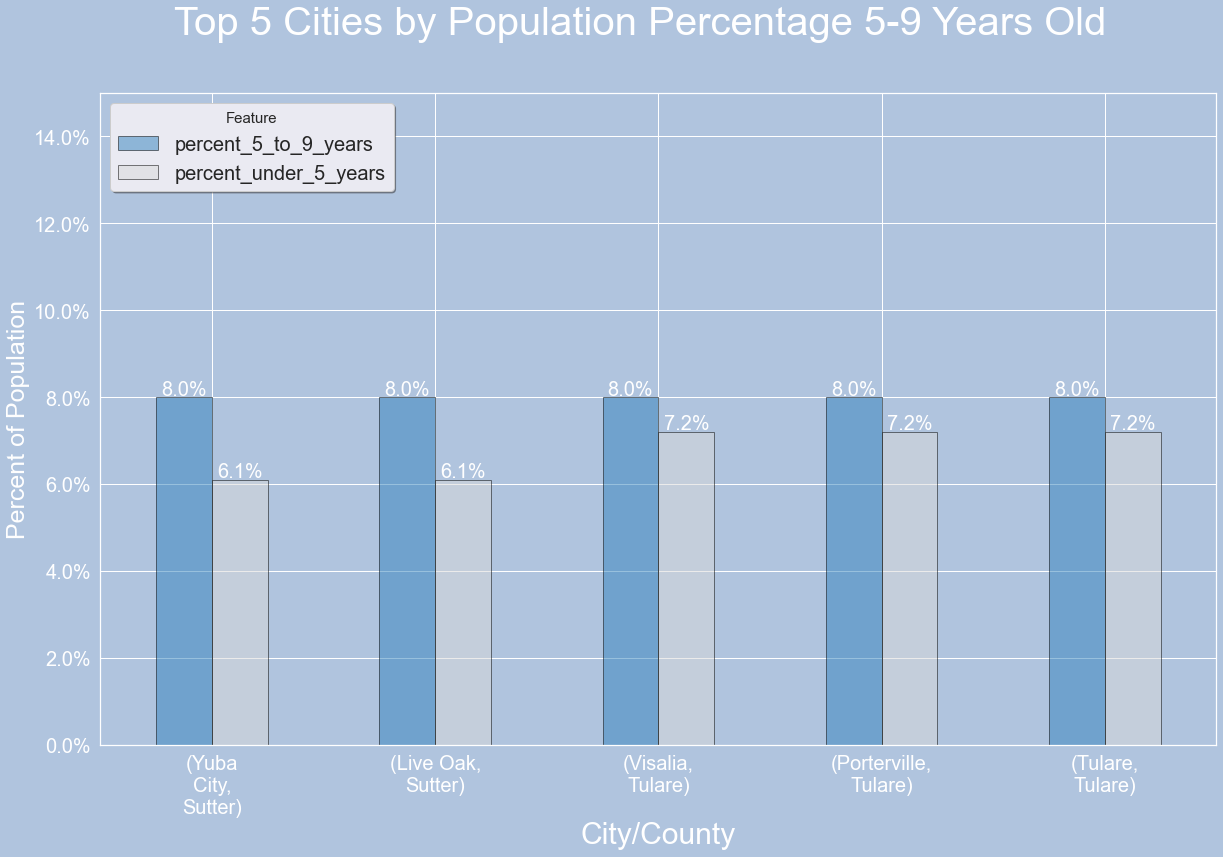

In [117]:
c = (df[df.avg_coc >0].groupby(['city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
       .sort_values(by = 'percent_5_to_9_years', ascending = False).head(5))

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Cities by Population Percentage 5-9 Years Old', fontsize=40, color='white')
plt.xlabel('City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.avgcoc.top5cities529.png',dpi=300, bbox_inches = "tight")
plt.show()


/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/2686091303.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

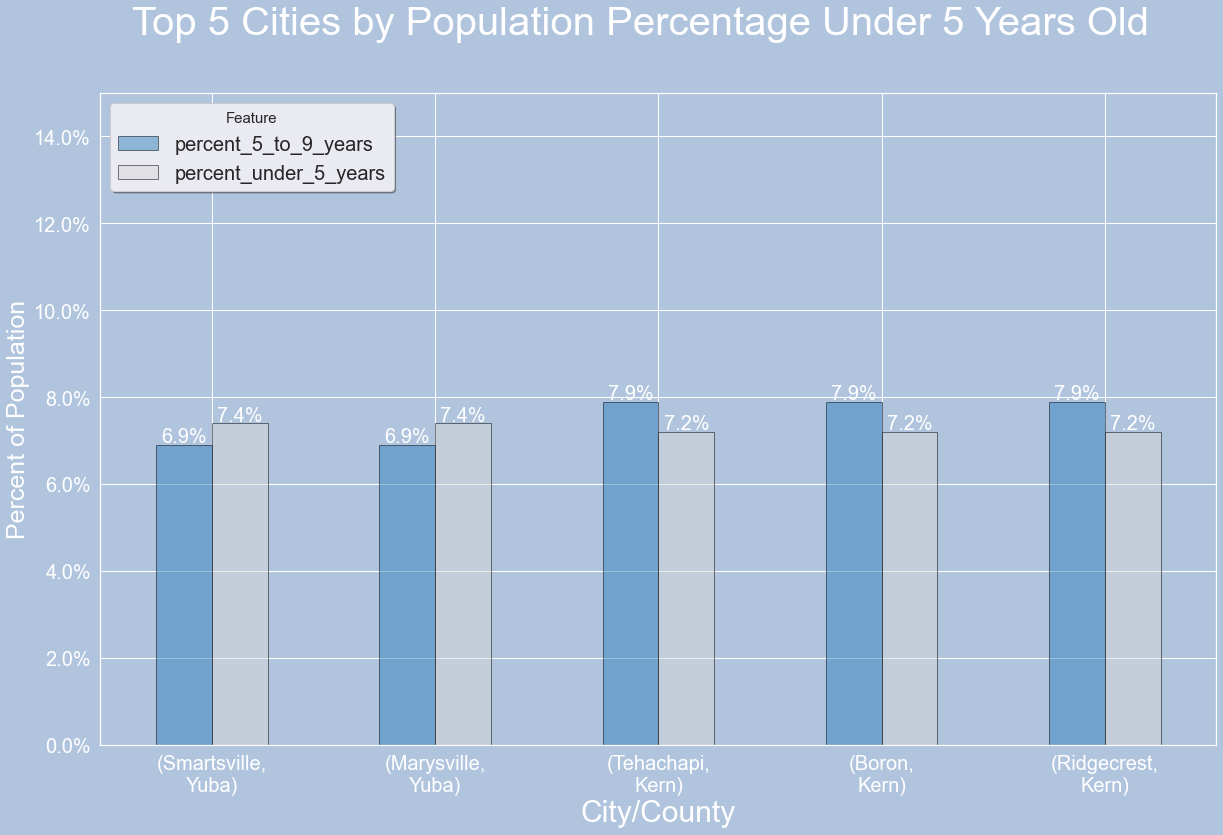

In [118]:
c = (df[df.avg_coc >0].groupby(['city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
       .sort_values(by = 'percent_under_5_years', ascending = False).head(5))

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Cities by Population Percentage Under 5 Years Old', fontsize=40, color='white')
plt.xlabel('City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.avgcoc.top5cities.u5.png',dpi=300, bbox_inches = "tight")
plt.show()


/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/1258194989.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['zip', 'city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

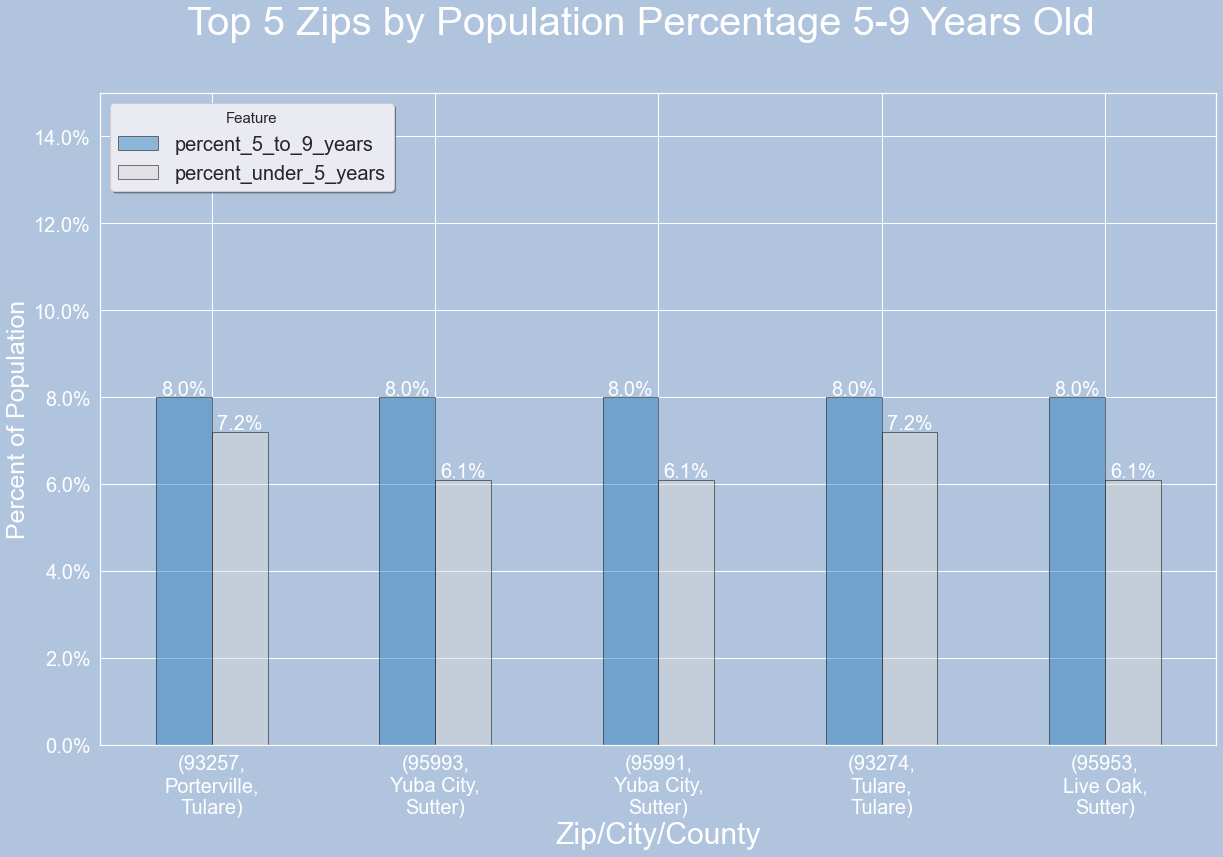

In [120]:
c = (df[df.avg_coc >0].groupby(['zip', 'city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
       .sort_values(by = 'percent_5_to_9_years', ascending = False).head(5))

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Zips by Population Percentage 5-9 Years Old', fontsize=40, color='white')
plt.xlabel('Zip/City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.avgcoc.top5zip529.png',dpi=300, bbox_inches = "tight")
plt.show()


/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/2410713206.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['zip', 'city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

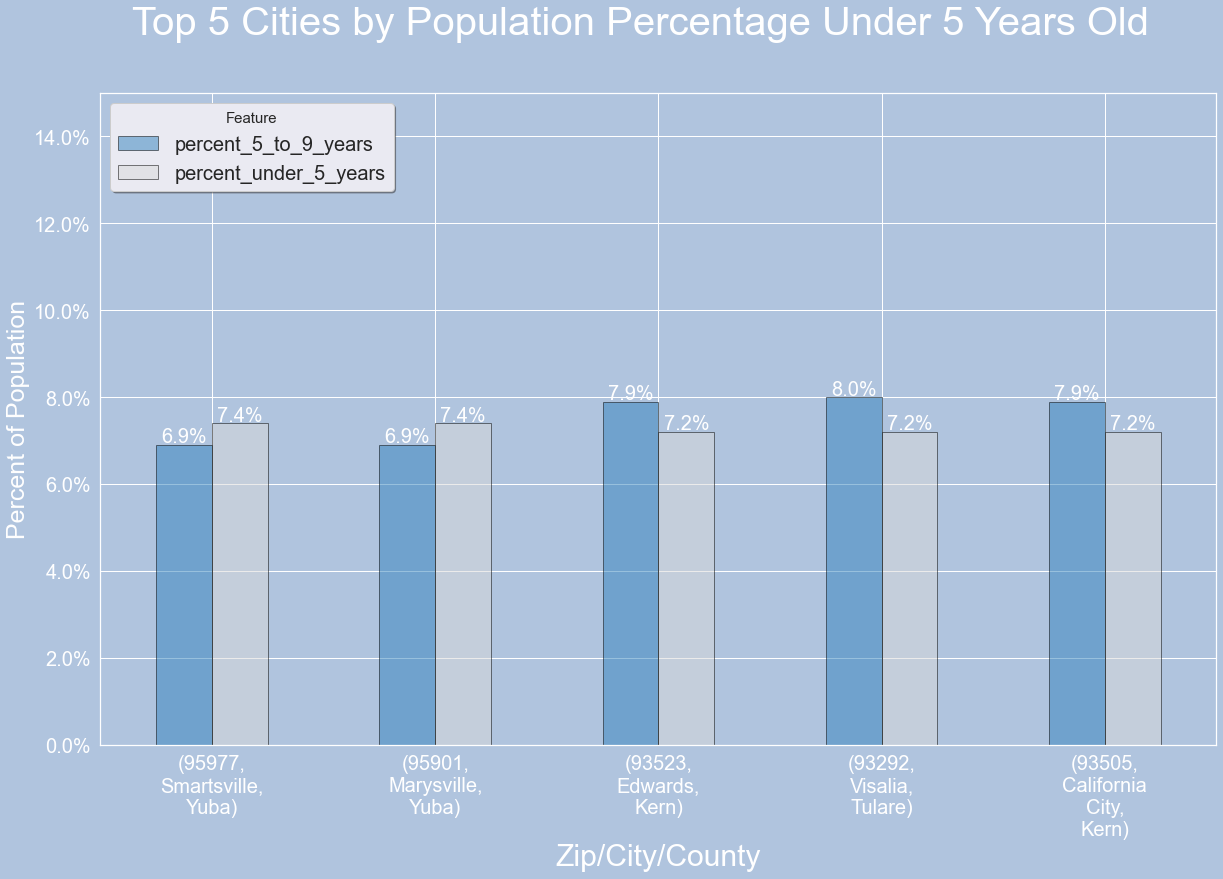

In [121]:
c = (df[df.avg_coc >0].groupby(['zip', 'city', 'county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
       .sort_values(by = 'percent_under_5_years', ascending = False).head(5))

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Cities by Population Percentage Under 5 Years Old', fontsize=40, color='white')
plt.xlabel('Zip/City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.avgcoc.top5zips.u5.png',dpi=300, bbox_inches = "tight")
plt.show()


/var/folders/3j/my4n0ykx0yb51nj_xv6qbxp40000gn/T/ipykernel_30857/2742408596.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = (df[df.avg_coc >0].groupby(['county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()


<Figure size 432x288 with 0 Axes>

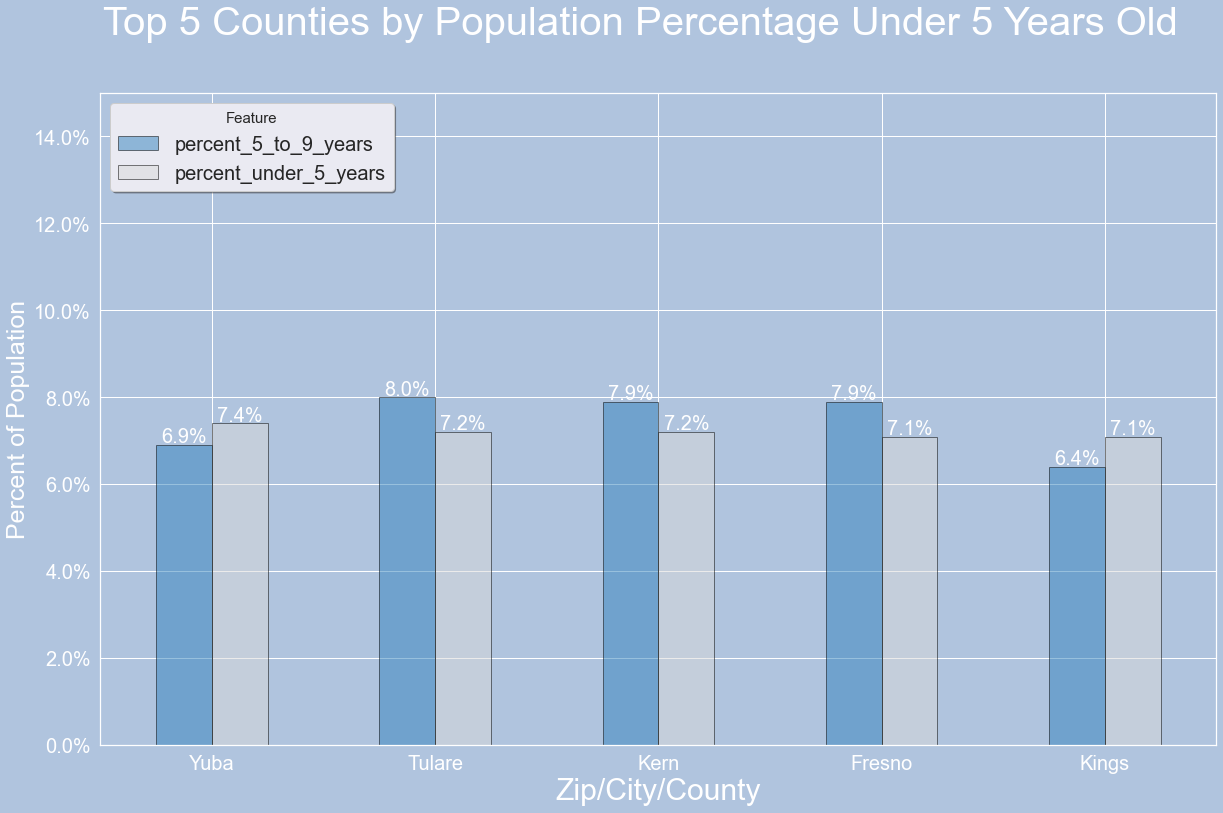

In [123]:
c = (df[df.avg_coc >0].groupby(['county'])['percent_5_to_9_years', 'percent_under_5_years'].mean()
       .sort_values(by = 'percent_under_5_years', ascending = False).head(5))

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black'
       )
plt.suptitle('Top 5 Counties by Population Percentage Under 5 Years Old', fontsize=40, color='white')
plt.xlabel('Zip/City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .15)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Percent of Population', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.legend(title='Feature', title_fontsize= 15, loc='upper left', shadow=True, fontsize=20)
plt.savefig('Plots/bar.avgcoc.top5counties.u5.png',dpi=300, bbox_inches = "tight")
plt.show()


<Figure size 432x288 with 0 Axes>

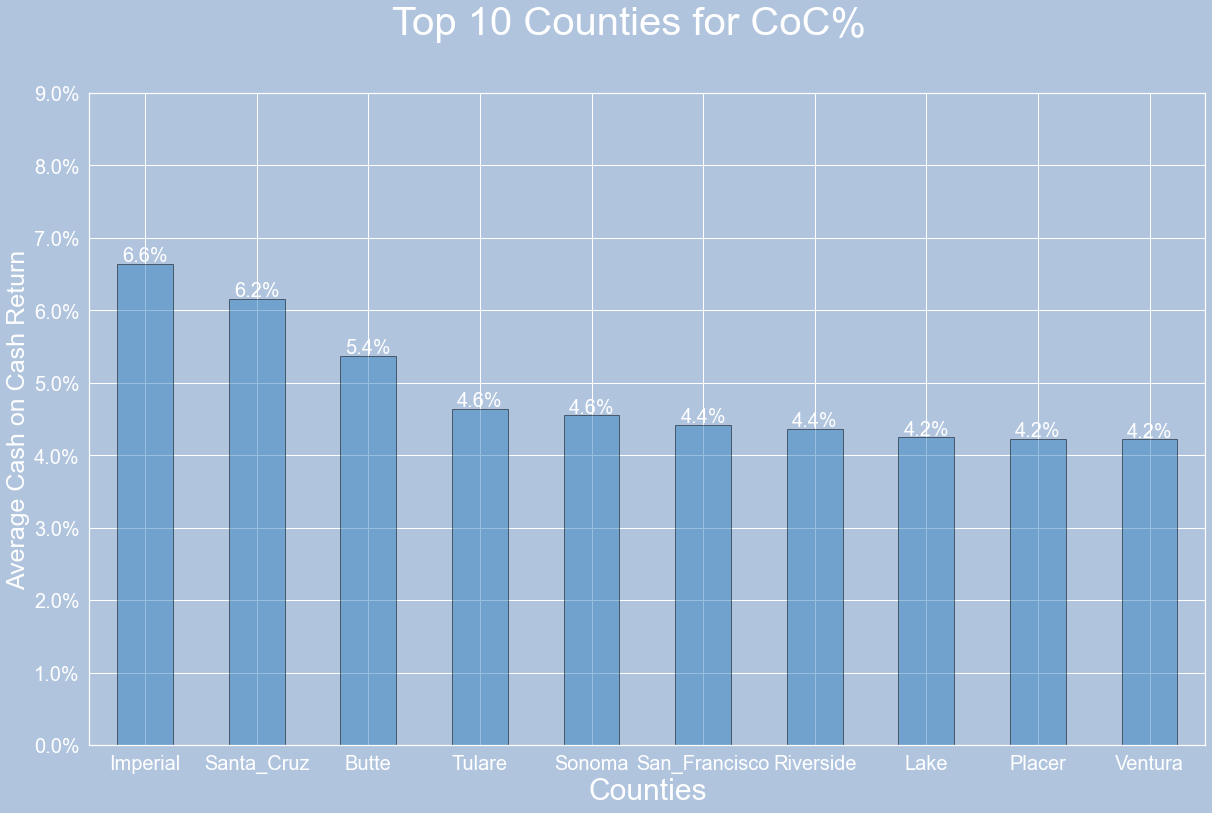

In [127]:
c = (df[df.avg_coc >0]).groupby(['county']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black',
       rot=45)
plt.suptitle('Top 10 Counties for CoC%', fontsize=40, color='white')
plt.xlabel('Counties', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
plt.ylim(0, .09)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
ax.get_legend().remove()
plt.savefig('Plots/bar.avgcoc.top10counties.png',dpi=300, bbox_inches = "tight")
plt.show()


<Figure size 432x288 with 0 Axes>

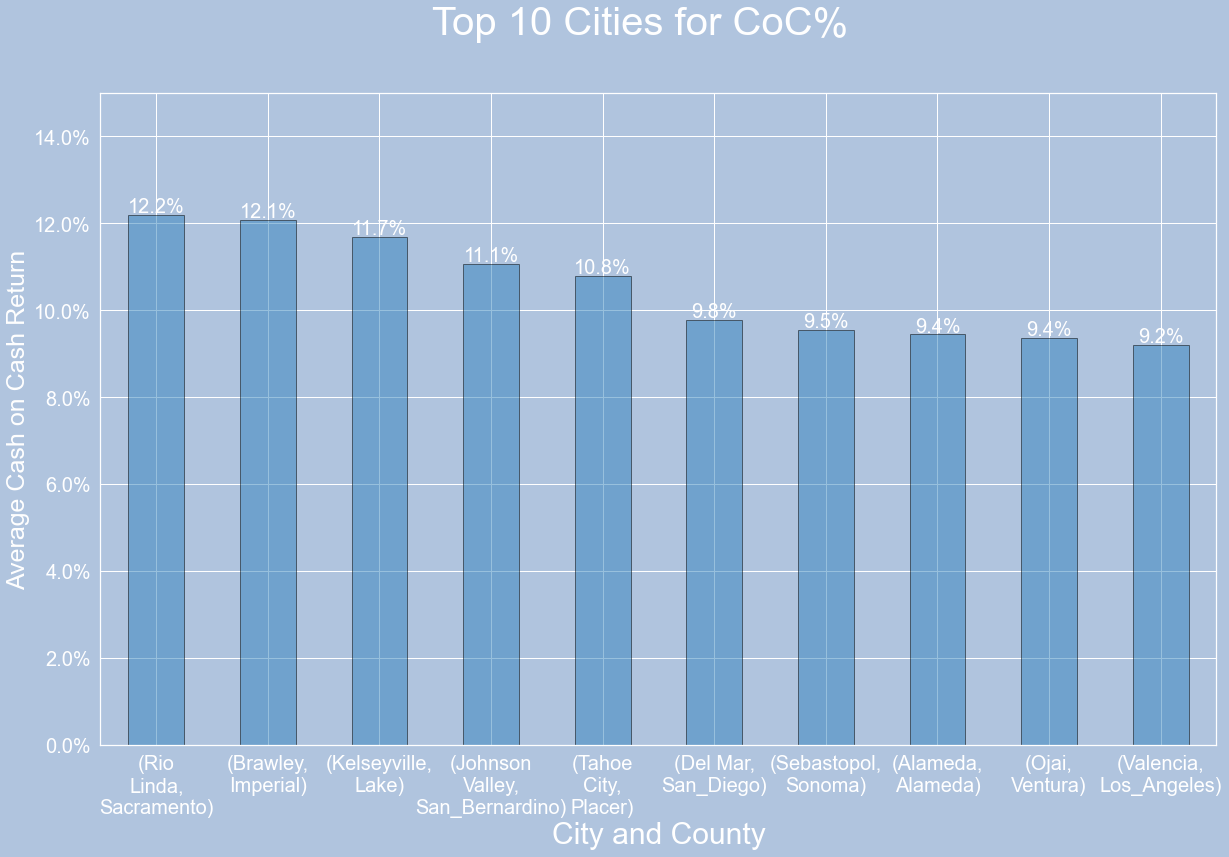

In [130]:
c = (df[df.avg_coc >0]).groupby(['city', 'county']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()
ax = c.plot(kind="bar",
       figsize=(20,12),
       cmap='tab20c',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Cities for CoC%', fontsize=40, color='white')
plt.xlabel('City and County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
ax.get_legend().remove()
plt.savefig('Plots/bar.avgcoc.top10cities.png',dpi=300, bbox_inches = "tight")
plt.show()



<Figure size 432x288 with 0 Axes>

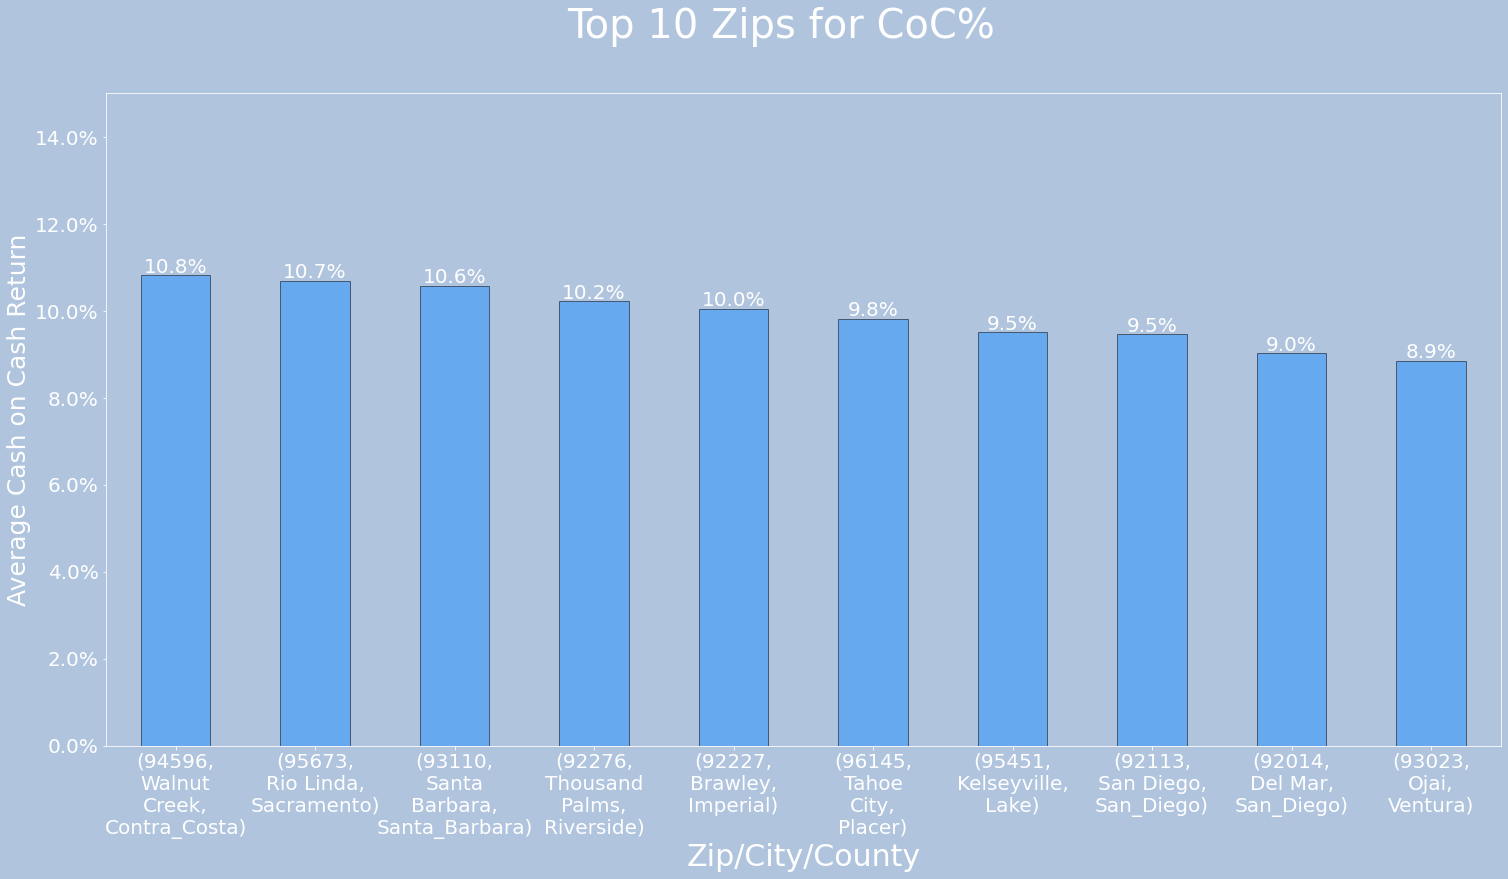

In [320]:
c = (df[df.avg_coc >0]).groupby(['zip', 'city', 'county']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)
plt.figure()
ax = c.plot(kind="bar",
       figsize=(25,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Zips for CoC%', fontsize=40, color='white')
plt.xlabel('Zip/City/County', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
ax.get_legend().remove()
plt.savefig('Plots/bar.avgcoc.countybedroom.png',dpi=300, bbox_inches = "tight")
plt.show()





<Figure size 432x288 with 0 Axes>

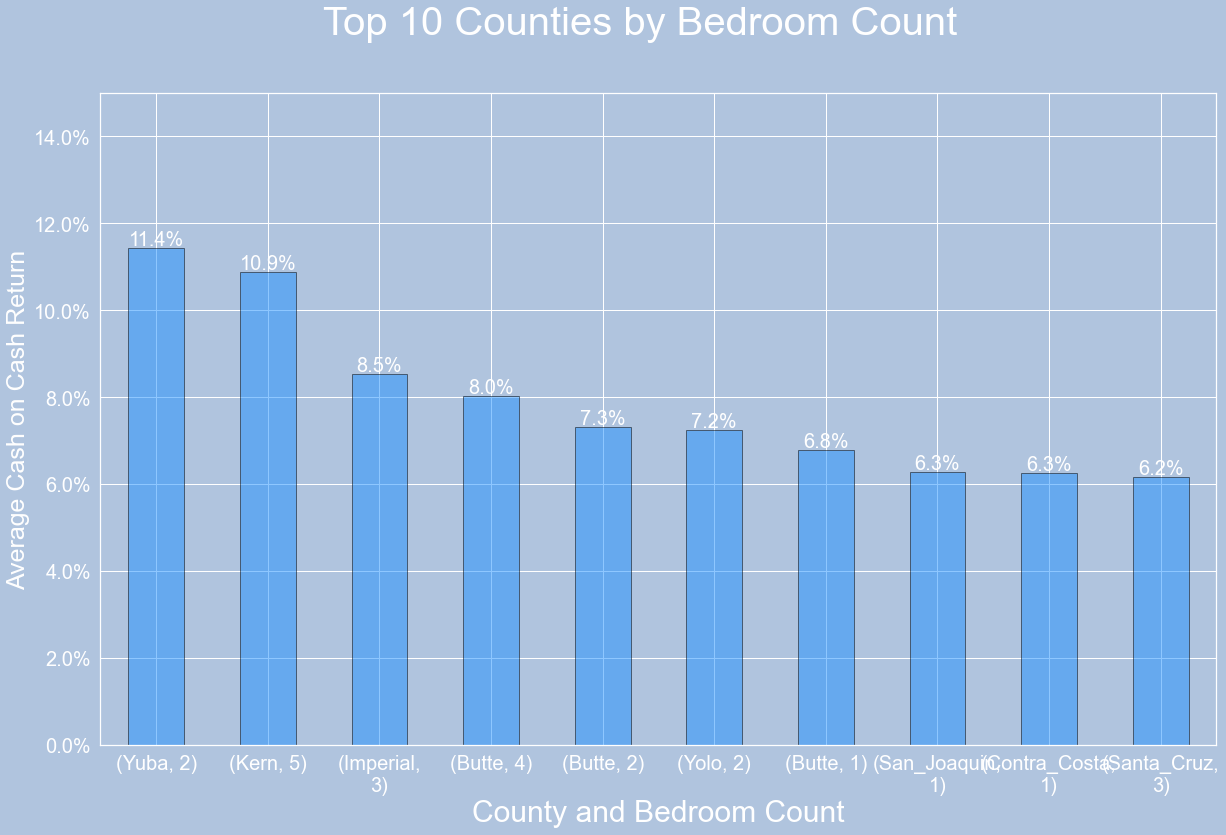

In [131]:
c = (df[df.avg_coc >0]).groupby(['county', 'bedrooms']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()

ax = c.plot(kind="bar",
       figsize=(20,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Counties by Bedroom Count', fontsize=40, color='white')
plt.xlabel('County and Bedroom Count', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.countybedroom.png',dpi=300, bbox_inches = "tight")
ax.get_legend().remove()
plt.show()







╒═════════════════════════════════════════╤═══════════╕
│                                         │   avg_coc │
╞═════════════════════════════════════════╪═══════════╡
│ ('Rio Linda', 'Sacramento', 4)          │  0.121873 │
├─────────────────────────────────────────┼───────────┤
│ ('Brawley', 'Imperial', 4)              │  0.120767 │
├─────────────────────────────────────────┼───────────┤
│ ('Kelseyville', 'Lake', 2)              │  0.116856 │
├─────────────────────────────────────────┼───────────┤
│ ('Marysville', 'Yuba', 2)               │  0.114281 │
├─────────────────────────────────────────┼───────────┤
│ ('Newman', 'Stanislaus', 3)             │  0.111839 │
├─────────────────────────────────────────┼───────────┤
│ ('Johnson Valley', 'San_Bernardino', 2) │  0.110725 │
├─────────────────────────────────────────┼───────────┤
│ ('Agoura Hills', 'Los_Angeles', 1)      │  0.11038  │
├─────────────────────────────────────────┼───────────┤
│ ('Anza', 'Riverside', 3)                │  0.1

<Figure size 432x288 with 0 Axes>

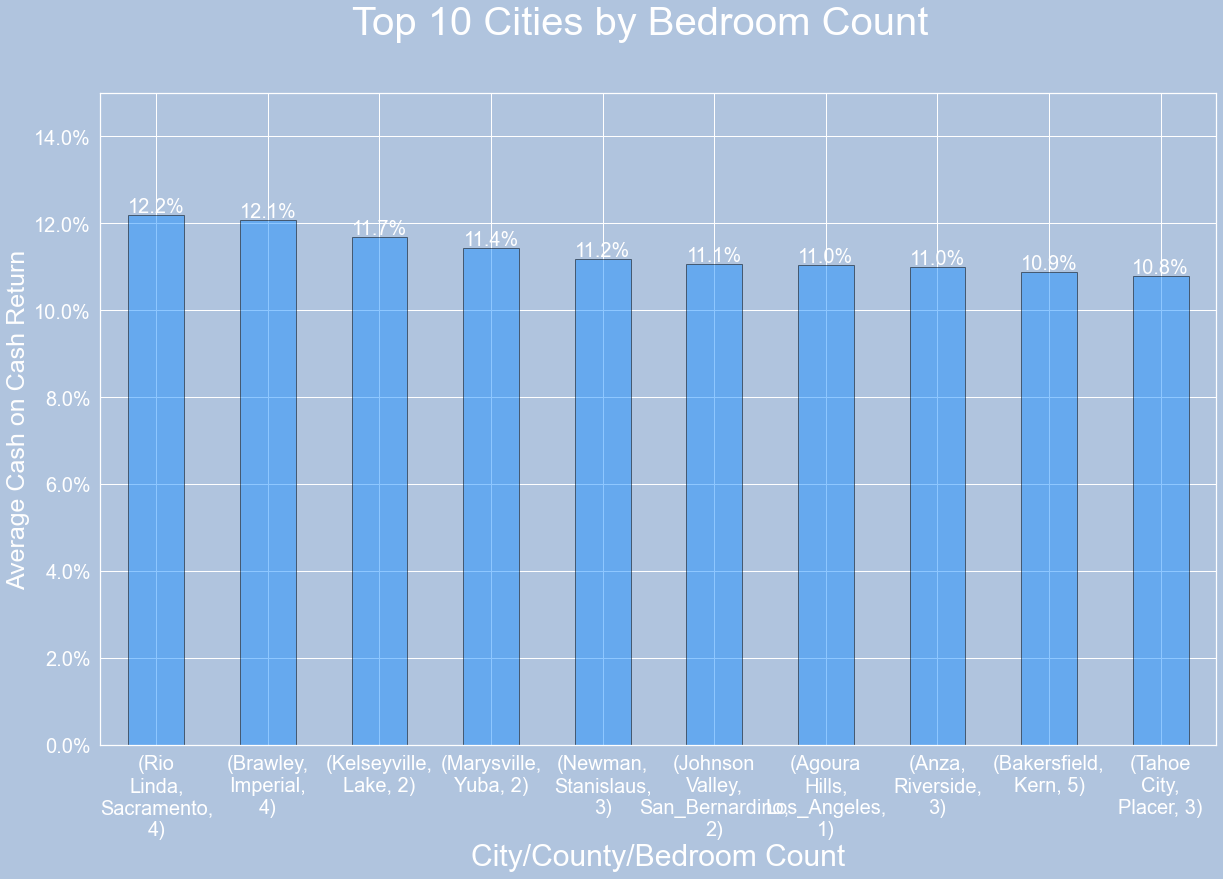

In [132]:
c = (df[df.avg_coc >0]).groupby(['city', 'county', 'bedrooms']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

print(tabulate(c, headers='keys', tablefmt ='fancy_grid'))

plt.figure()

ax = c.plot(kind="bar",
       figsize=(20,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Cities by Bedroom Count', fontsize=40, color='white')
plt.xlabel('City/County/Bedroom Count', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.citybedroom.png',dpi=300, bbox_inches = "tight")
ax.get_legend().remove()
plt.show()







<Figure size 432x288 with 0 Axes>

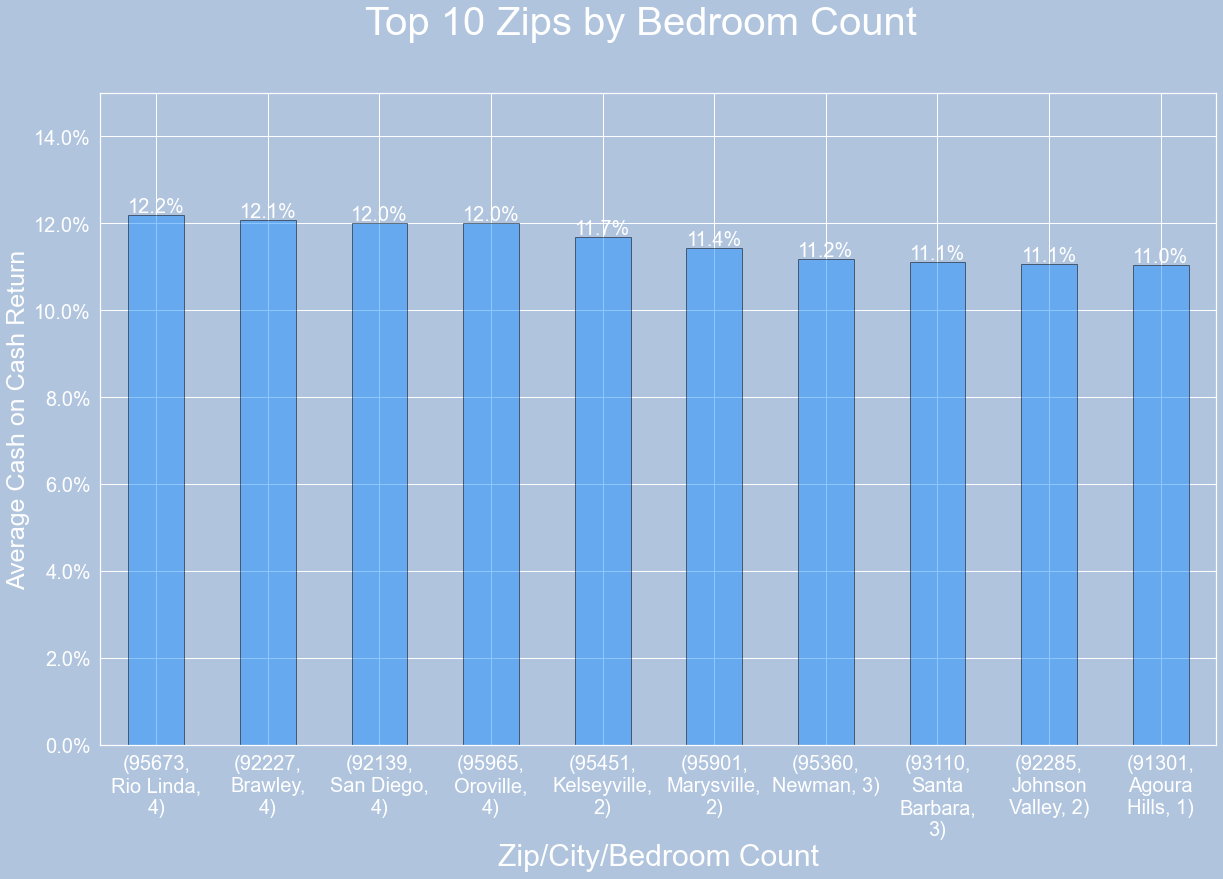

In [137]:
c = (df[df.avg_coc >0]).groupby(['zip', 'city', 'bedrooms']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()

ax = c.plot(kind="bar",
       figsize=(20,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Zips by Bedroom Count', fontsize=40, color='white')
plt.xlabel('Zip/City/Bedroom Count', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
ax.get_legend().remove()
plt.savefig('Plots/bar.avgcoc.zipbedroom.png',dpi=300, bbox_inches = "tight")
plt.show();





<Figure size 432x288 with 0 Axes>

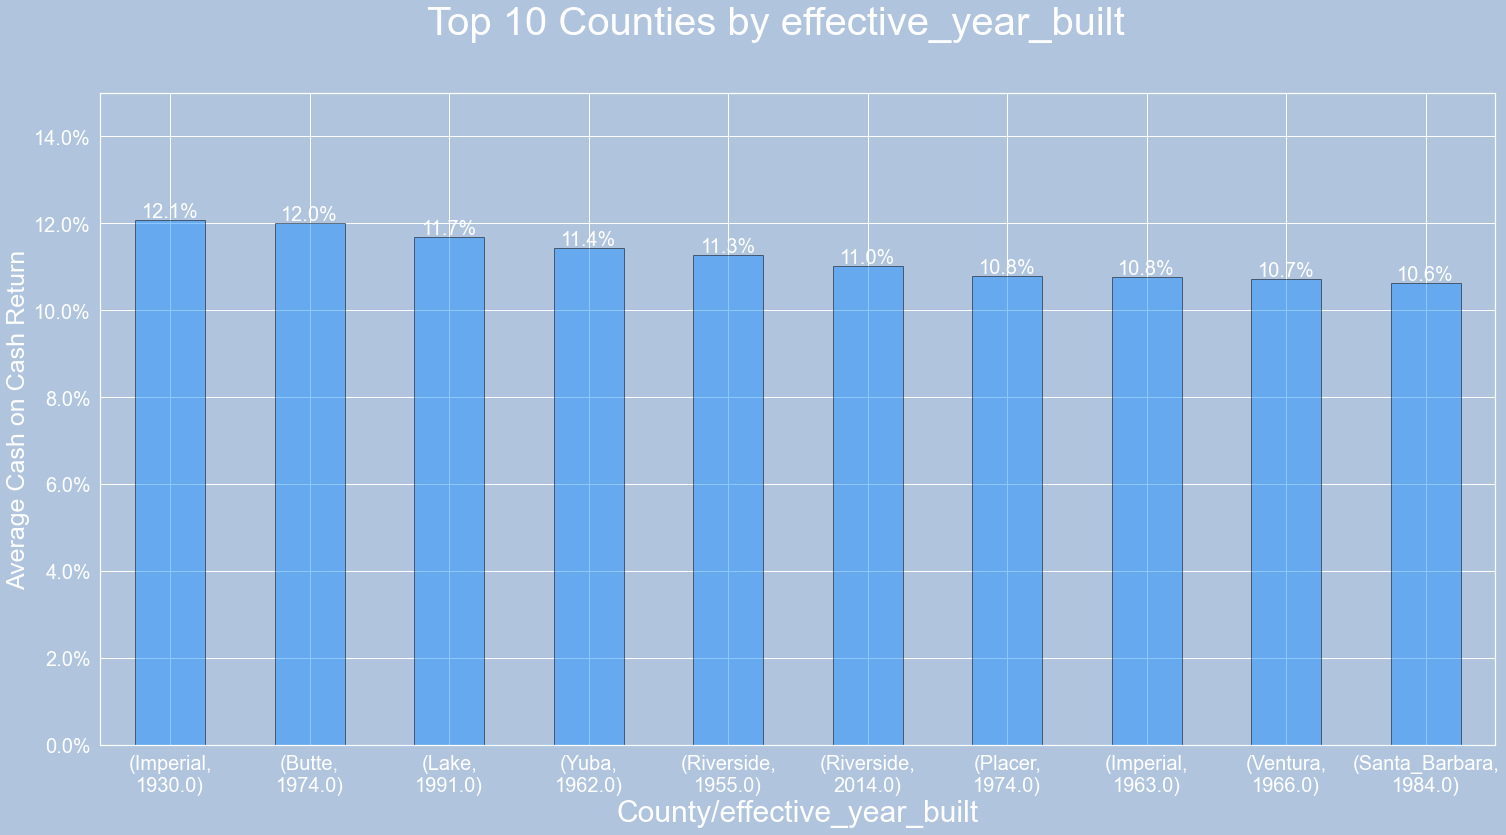

In [23]:
c = (df[df.avg_coc >0]).groupby(['county', 'effective_year_built']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()

ax = c.plot(kind="bar",
       figsize=(25,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Counties by effective_year_built', fontsize=40, color='white')
plt.xlabel('County/effective_year_built', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.citybedroom.png',dpi=300, bbox_inches = "tight")
ax.get_legend().remove()
plt.show()








<Figure size 432x288 with 0 Axes>

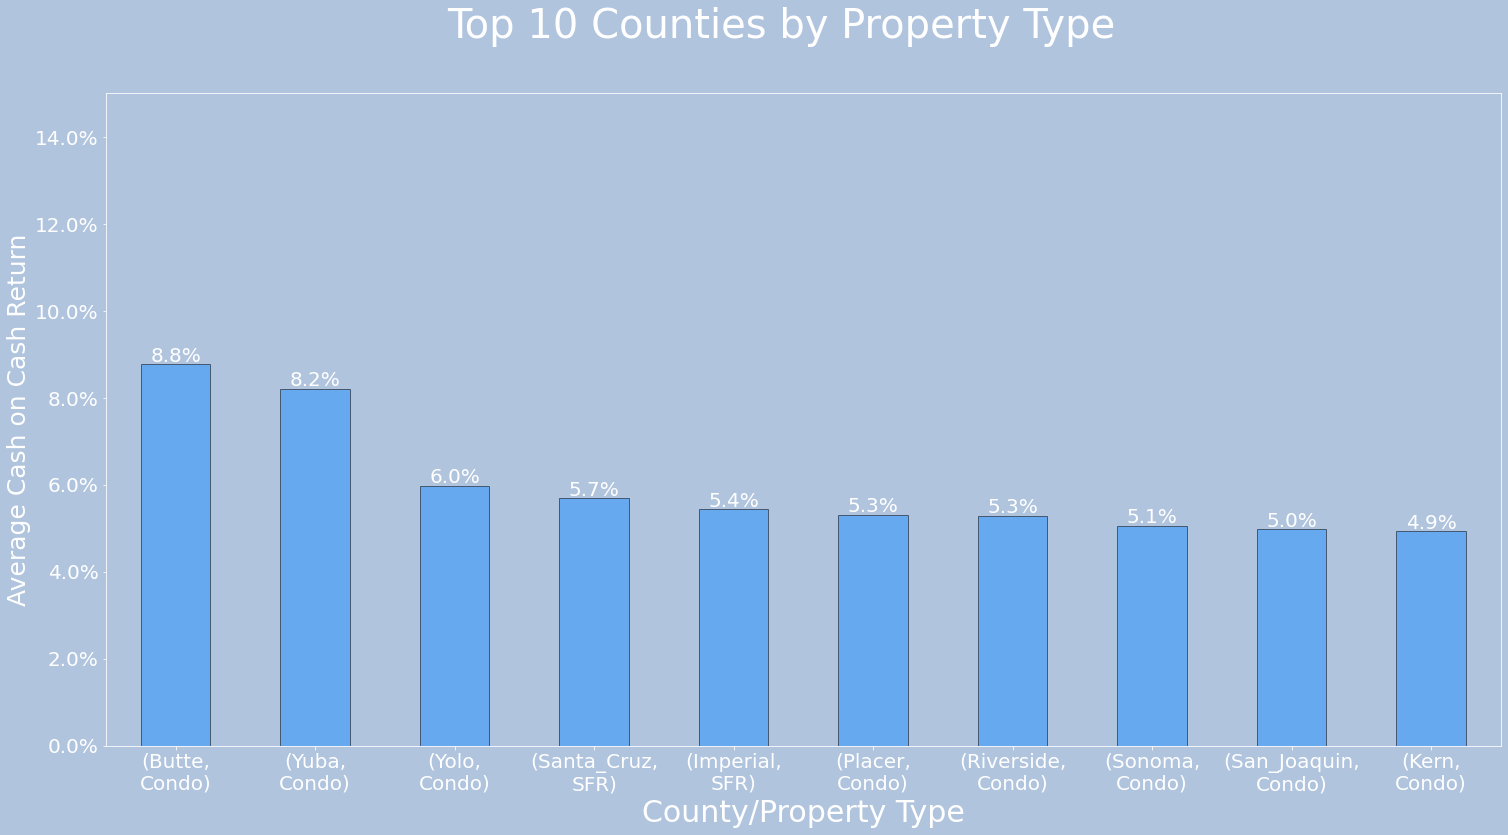

In [326]:
c = (df[df.avg_coc >0]).groupby(['county', 'property_type']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()

ax = c.plot(kind="bar",
       figsize=(25,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Counties by Property Type', fontsize=40, color='white')
plt.xlabel('County/Property Type', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.citybedroom.png',dpi=300, bbox_inches = "tight")
ax.get_legend().remove()
plt.show()








<Figure size 432x288 with 0 Axes>

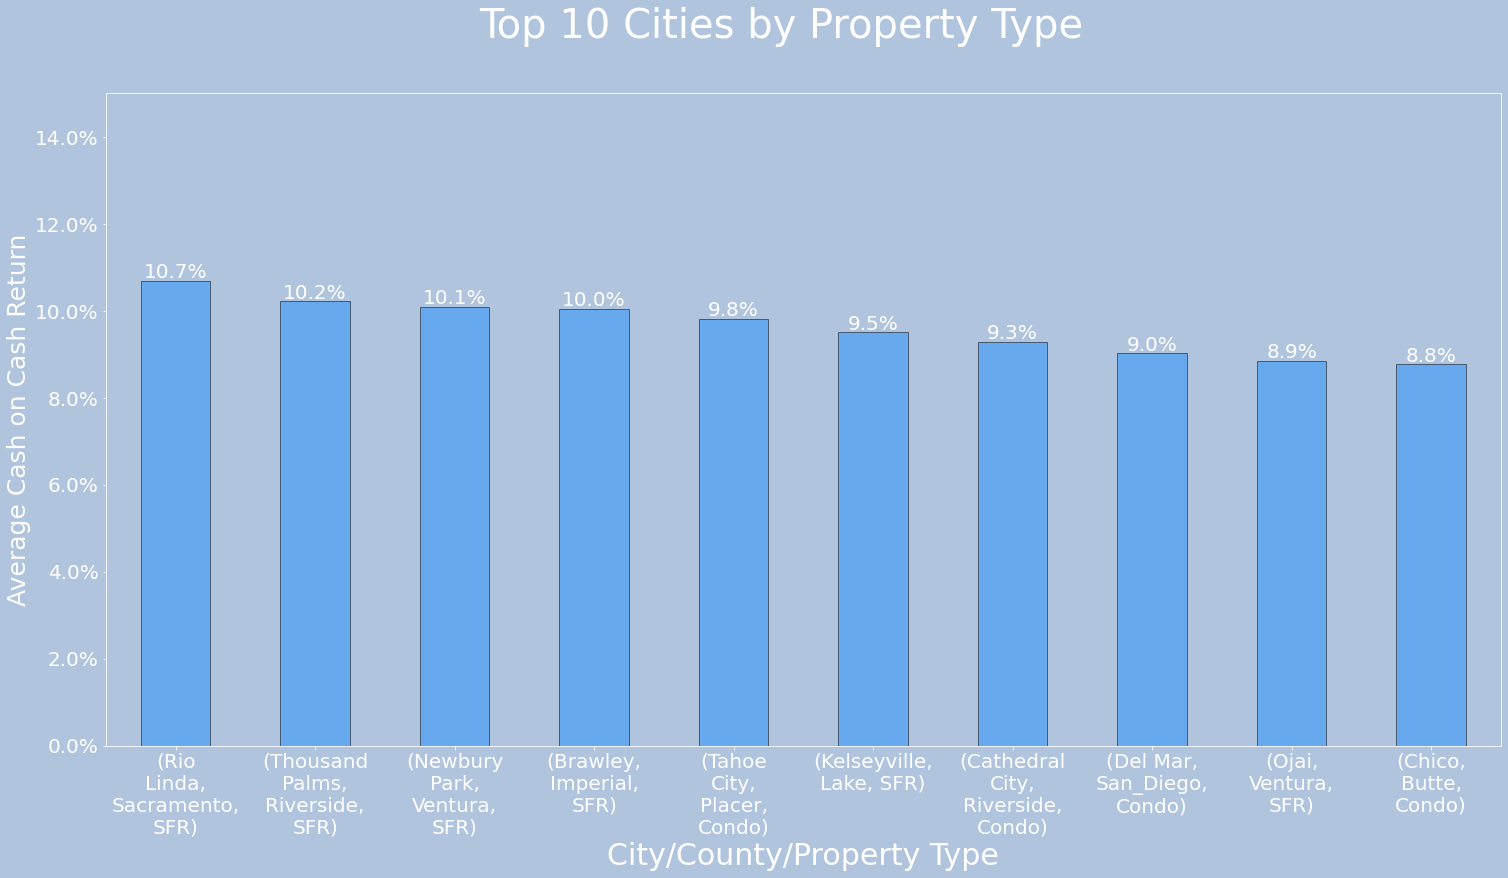

In [327]:
c = (df[df.avg_coc >0]).groupby(['city', 'county', 'property_type']).agg({'avg_coc':'mean'}).sort_values(by = ('avg_coc'), ascending = False).head(10)

plt.figure()

ax = c.plot(kind="bar",
       figsize=(25,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .15)
plt.suptitle('Top 10 Cities by Property Type', fontsize=40, color='white')
plt.xlabel('City/County/Property Type', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.citybedroom.png',dpi=300, bbox_inches = "tight")
ax.get_legend().remove()
plt.show()










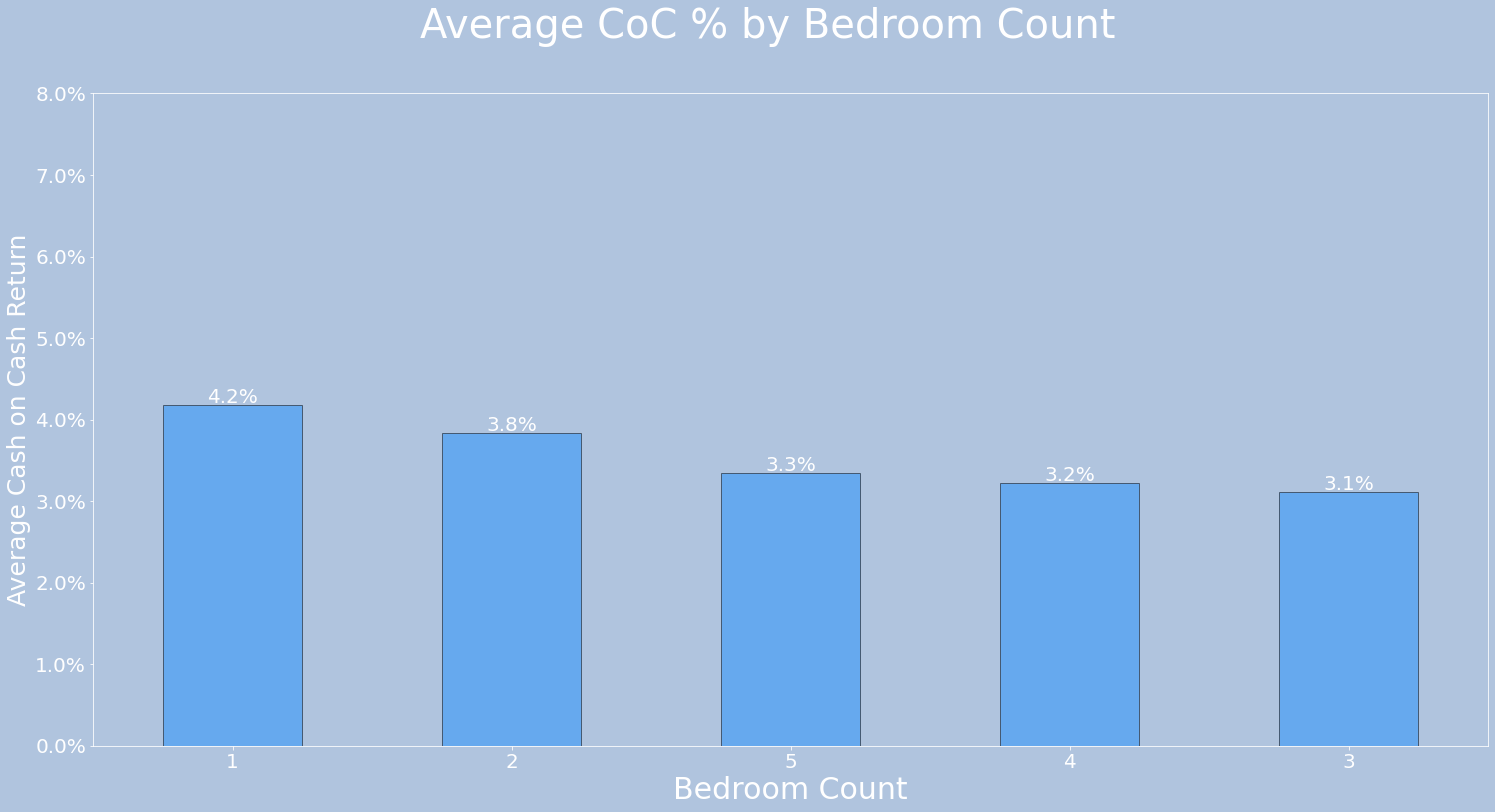

In [356]:
e = (df[df.avg_coc >0].groupby(['bedrooms'])['avg_coc'].mean().sort_values(ascending = False).head(5))

plt.figure()

ax = e.plot(kind="bar",
       figsize=(25,12),
       color='dodgerblue',
       alpha = .5,
       edgecolor = 'black',
       )
plt.ylim(0, .08)
plt.suptitle('Average CoC % by Bedroom Count', fontsize=40, color='white')
plt.xlabel('Bedroom Count', fontsize=30)
plt.xticks(wrap=True, fontsize=20)
ax.xaxis.get_majorticklabels()[2].set_x(10**199)
ax.xaxis.label.set_color('white')    
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.yticks(fontsize=20)
plt.ylabel('Average Cash on Cash Return', fontsize=25)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
for bar in ax.patches:
       height = bar.get_height()
       percent = (height) * 100
       ax.annotate('%.1f' % percent + '%', 
                     (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                     size=20, xytext=(0, 8), color='white',
                     textcoords='offset points')
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.gcf().set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
plt.savefig('Plots/bar.avgcoc.countybedroom.png',dpi=300, bbox_inches = "tight")
plt.show()
